In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import yeojohnson
from sklearn.model_selection import GridSearchCV

In [2]:
pip install joblib

In [39]:
import joblib
import json

In [5]:
data = pd.read_csv("/content/keystroke_human_bot_data_latest.csv")
print(data.head(5))

   Typing Speed  No of Backspaces  Avg Hold Time  Max Hold Time  \
0    133.378946                 0       1.866909       2.753973   
1     67.014300                 0       1.760927       2.753973   
2     31.508873                 0       1.844040       6.403923   
3     35.220954                 0       1.684720       6.403923   
4     28.473118                 0       1.682803       6.403923   

   Min Hold Time  Avg Keystroke Latency  Max Keystroke Latency  \
0       1.531839             144.360105             192.005634   
1       1.005173              69.336806             201.091051   
2       0.907421              32.205485             201.091051   
3       0.907421              35.778093             201.091051   
4       0.907421              28.810184             201.091051   

   Min Keystroke Latency  Avg Digraph Duration  Max Digraph Duration  \
0              71.172237            142.471373            189.877510   
1           -1732.320547             67.583850          

In [6]:
bot_data = data[data["output_label"]==0]
human_data = data[data["output_label"]==1]
human_data_new = human_data.sample(n=len(bot_data))
data = pd.concat([bot_data, human_data_new], ignore_index=True)

In [7]:
print("Dataset length : ", len(data))
print("Dataset shape : ", data.shape)

Dataset length :  33000
Dataset shape :  (33000, 15)


In [8]:
bot_data = data[data["output_label"]==0]
print("Bot Data : ", len(bot_data))
human_data = len(data) - len(bot_data)
print("Human Data : ", human_data)

Bot Data :  16500
Human Data :  16500


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Typing Speed               33000 non-null  float64
 1   No of Backspaces           33000 non-null  int64  
 2   Avg Hold Time              33000 non-null  float64
 3   Max Hold Time              33000 non-null  float64
 4   Min Hold Time              33000 non-null  float64
 5   Avg Keystroke Latency      33000 non-null  float64
 6   Max Keystroke Latency      33000 non-null  float64
 7   Min Keystroke Latency      33000 non-null  float64
 8   Avg Digraph Duration       33000 non-null  float64
 9   Max Digraph Duration       33000 non-null  float64
 10  Min Digraph Duration       33000 non-null  float64
 11  Avg Inter-Release Latency  33000 non-null  float64
 12  Max Inter-Release Latency  33000 non-null  float64
 13  Min Inter-Release Latency  33000 non-null  flo

In [ ]:
data.nunique()

,0
Typing Speed,28805
No of Backspaces,199
Avg Hold Time,28946
Max Hold Time,4921
Min Hold Time,613
Avg Keystroke Latency,28985
Max Keystroke Latency,9965
Min Keystroke Latency,1187
Avg Digraph Duration,28986
Max Digraph Duration,9738


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Typing Speed,33000.0,4.005173e+02,2.367260e+03,-4.006995e+03,0.007004,127.994495,294.944910,1.971691e+05
No of Backspaces,33000.0,1.771324e+01,2.702123e+01,0.000000e+00,0.000000,0.000000,30.000000,3.030000e+02
Avg Hold Time,33000.0,1.799482e+06,1.841969e+08,7.701755e-01,1.697076,9.011425,118.373715,3.262420e+10
Max Hold Time,33000.0,6.260141e+08,3.038721e+10,9.272461e-01,9.810925,54.000000,960.000000,1.477760e+12
Min Hold Time,33000.0,1.316202e+01,8.578402e+01,-1.178100e+04,0.705719,1.000000,27.000000,2.520000e+02
Avg Keystroke Latency,33000.0,4.055329e+02,2.390300e+03,-4.012230e+03,0.006622,128.068611,295.283415,1.974960e+05
Max Keystroke Latency,33000.0,6.261215e+08,3.038721e+10,0.000000e+00,15.968561,2210.000000,6987.000000,1.477760e+12
Min Keystroke Latency,33000.0,-6.260911e+08,3.038721e+10,-1.477760e+12,-72.814465,-37.212610,26.000000,4.240000e+03
Avg Digraph Duration,33000.0,-1.801504e+06,1.844381e+08,-3.266673e+10,-1.605010,12.071333,176.648068,1.973938e+05
Max Digraph Duration,33000.0,1.085589e+05,1.339659e+06,0.000000e+00,0.275612,2079.500000,6542.250000,1.236273e+08


In [11]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['Typing Speed', 'No of Backspaces', 'Avg Hold Time', 'Max Hold Time', 'Min Hold Time', 'Avg Keystroke Latency', 'Max Keystroke Latency', 'Min Keystroke Latency', 'Avg Digraph Duration', 'Max Digraph Duration', 'Min Digraph Duration', 'Avg Inter-Release Latency', 'Max Inter-Release Latency', 'Min Inter-Release Latency', 'output_label']


In [12]:
def calculate_skewness():
  for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Typing Speed
Skew : 51.38


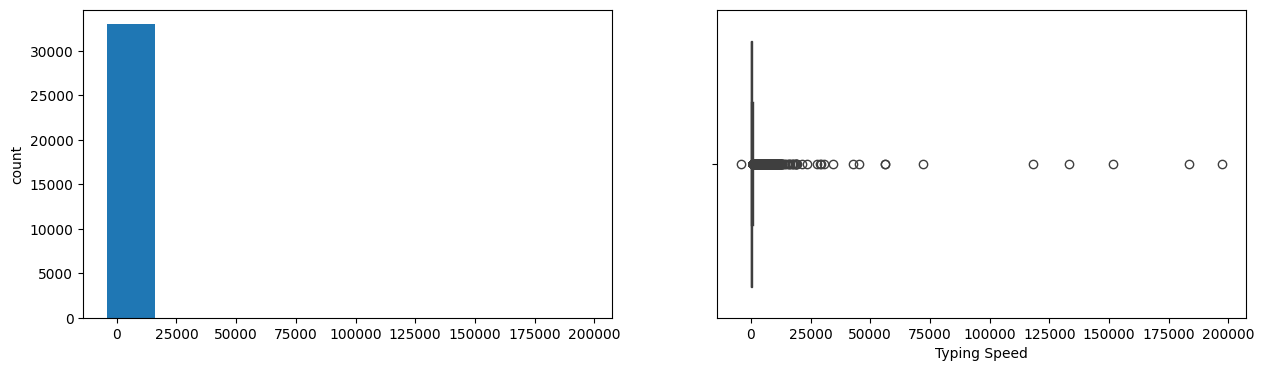

No of Backspaces
Skew : 2.06


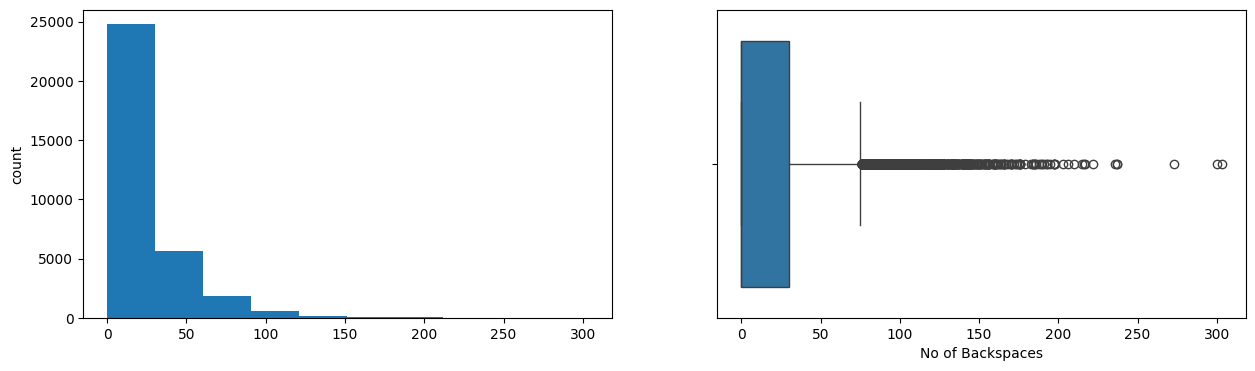

Avg Hold Time
Skew : 168.91


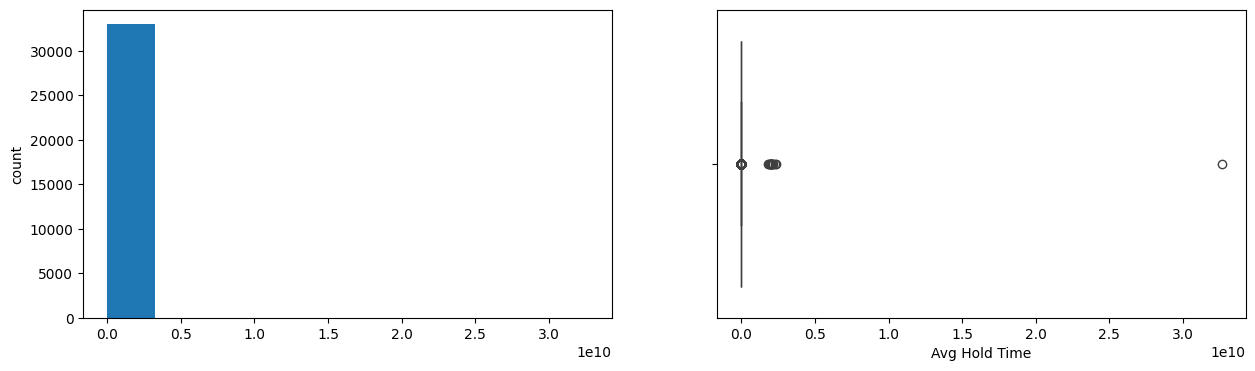

Max Hold Time
Skew : 48.52


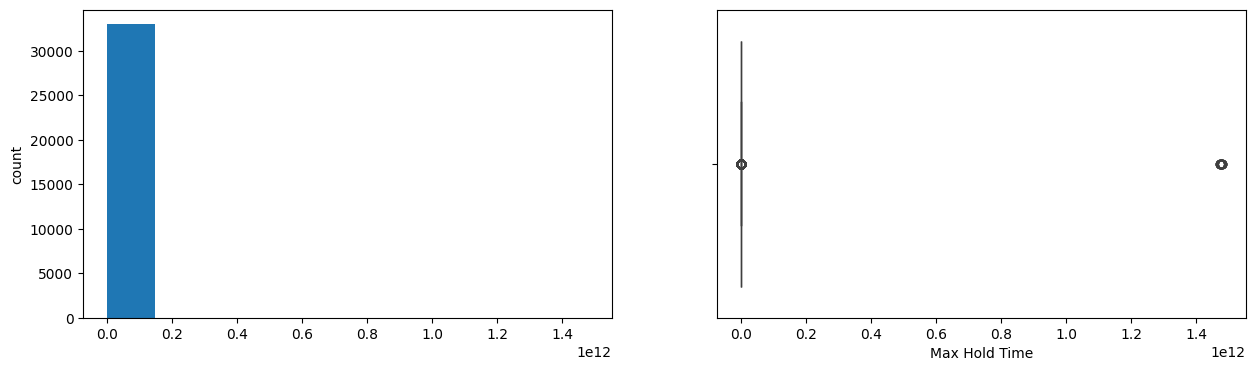

Min Hold Time
Skew : -98.5


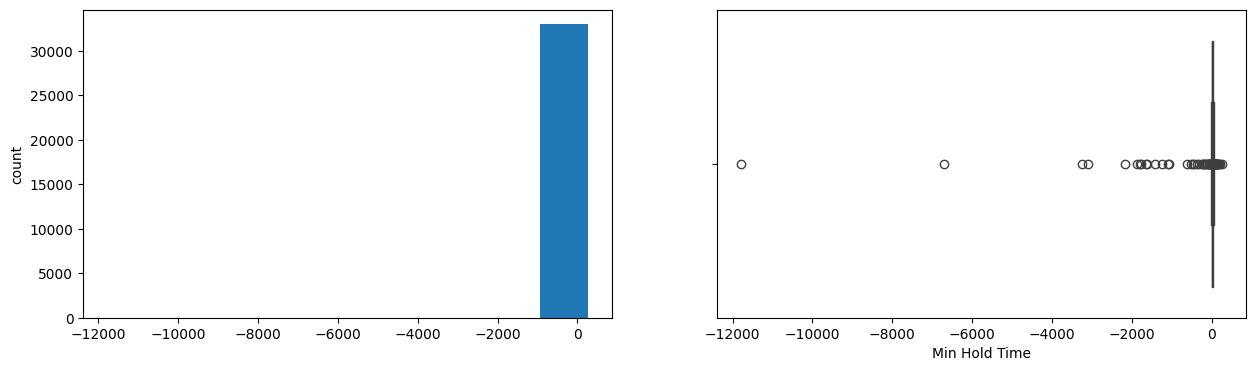

Avg Keystroke Latency
Skew : 50.61


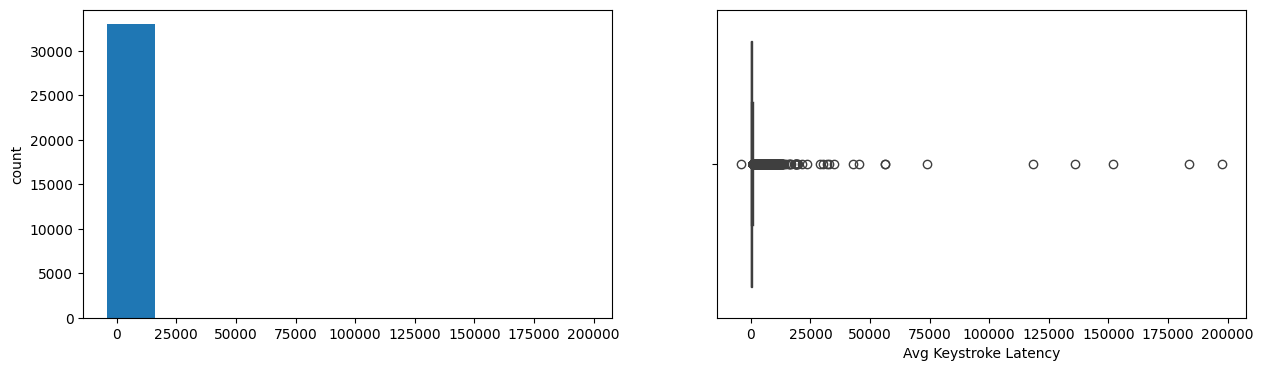

Max Keystroke Latency
Skew : 48.52


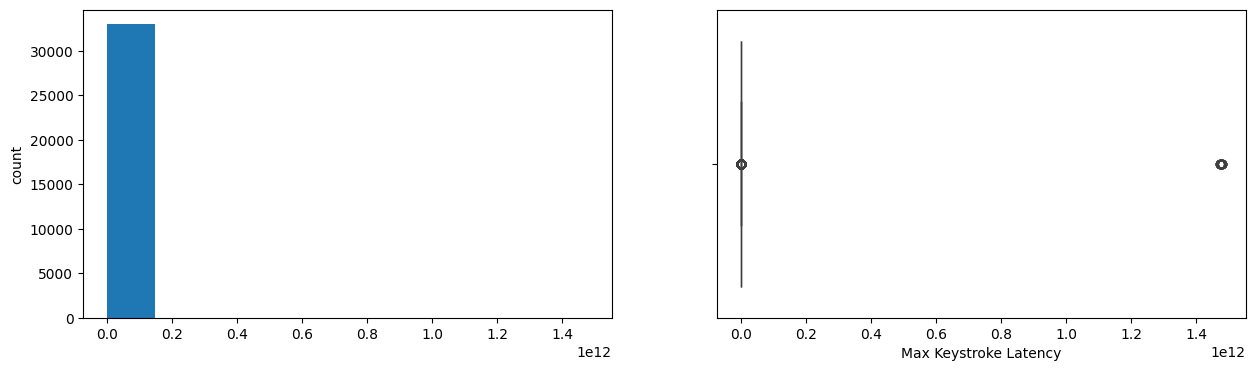

Min Keystroke Latency
Skew : -48.52


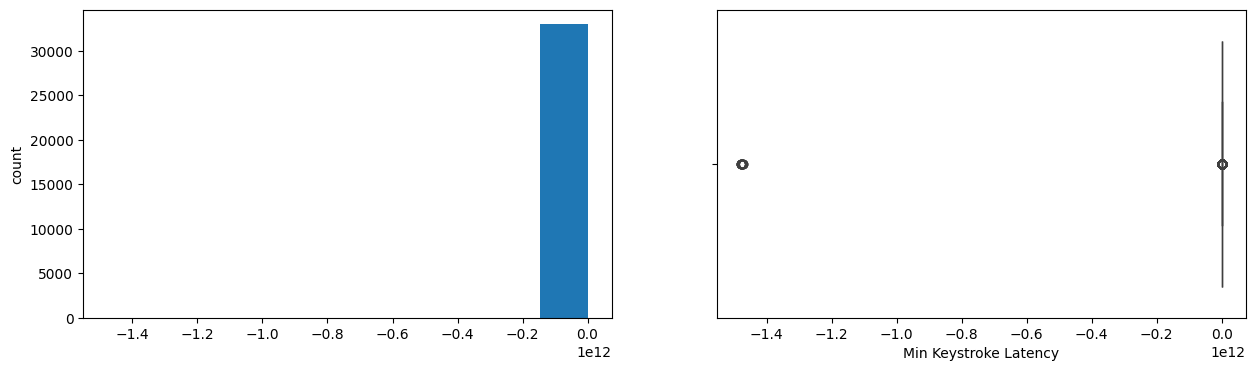

Avg Digraph Duration
Skew : -168.91


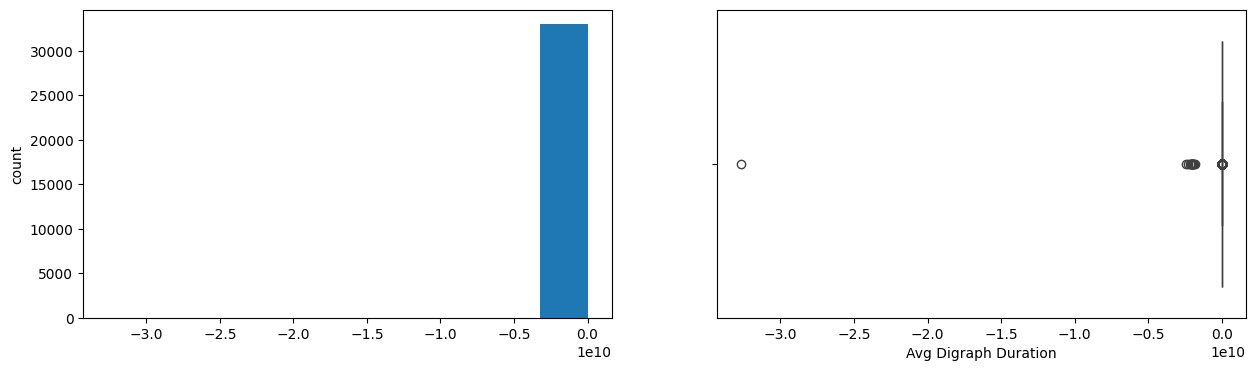

Max Digraph Duration
Skew : 49.93


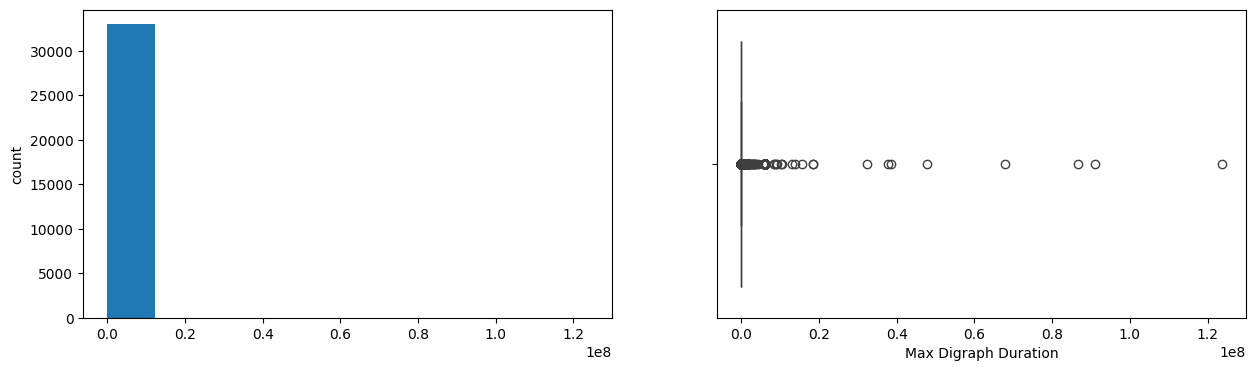

Min Digraph Duration
Skew : -48.52


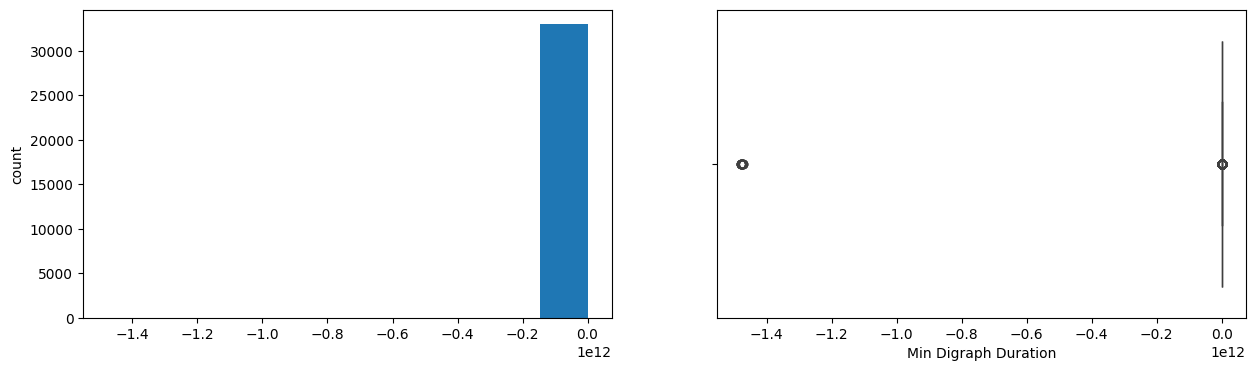

Avg Inter-Release Latency
Skew : 50.62


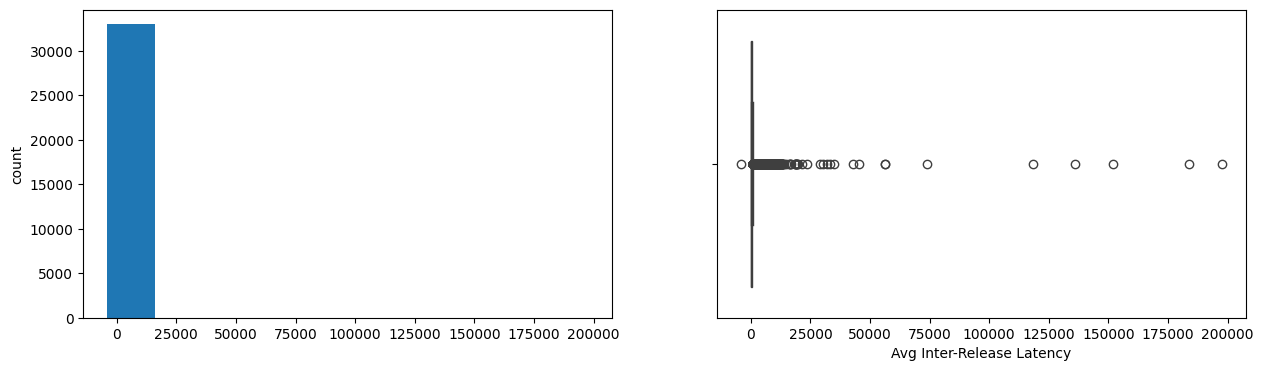

Max Inter-Release Latency
Skew : 49.93


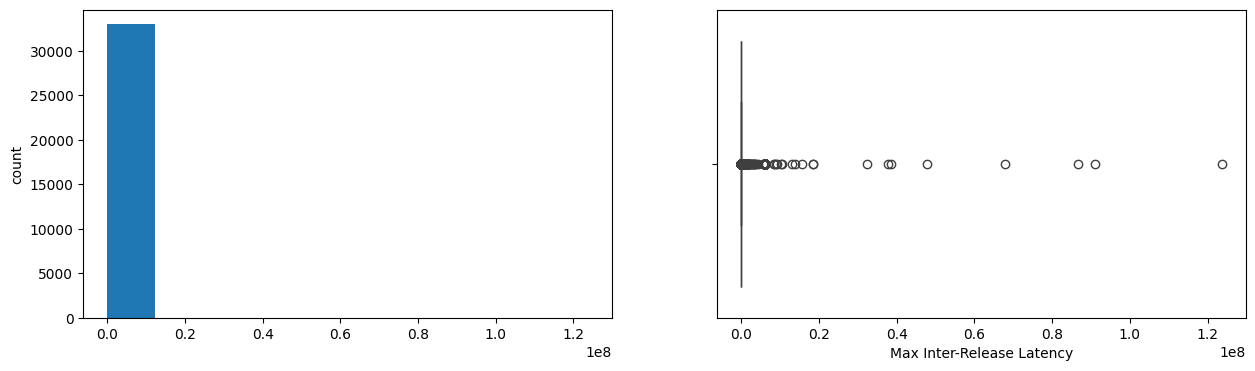

Min Inter-Release Latency
Skew : -8.71


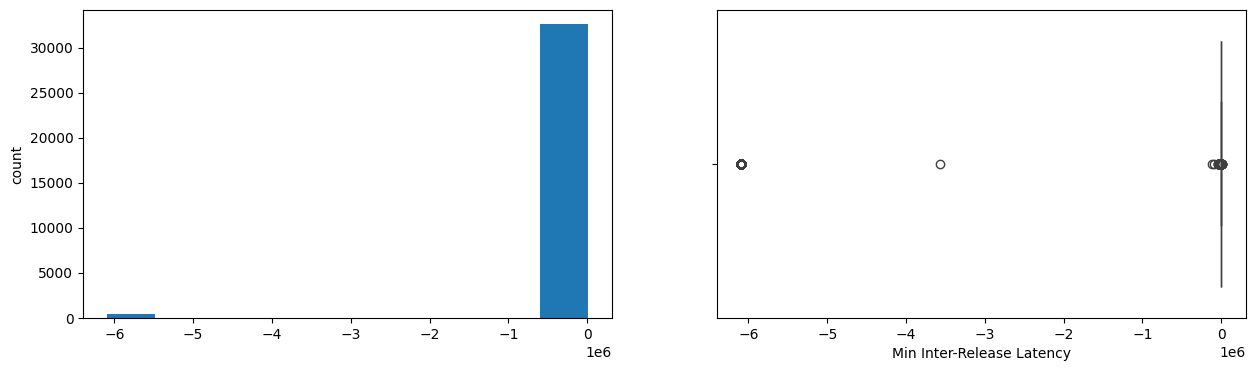

output_label
Skew : 0.0


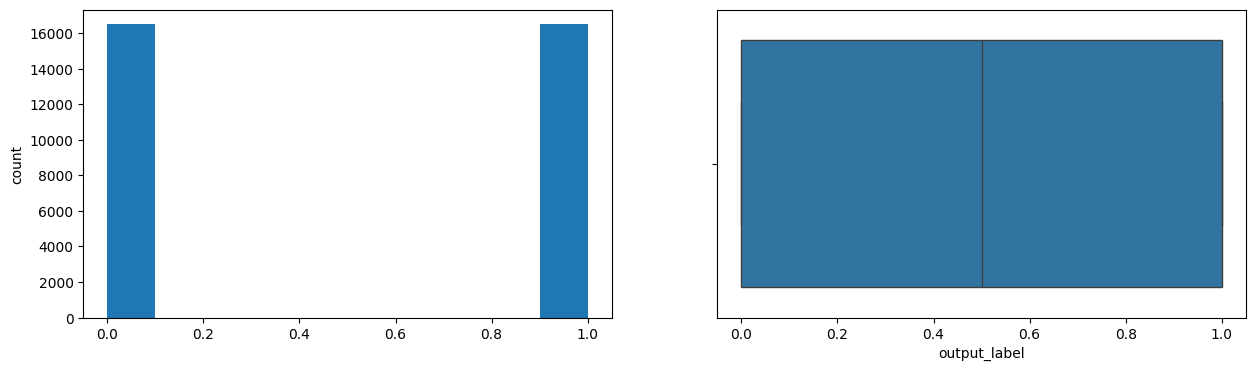

In [13]:
calculate_skewness()

In [14]:
def logTransform(data):
    data = data.copy()
    for col in ["Typing Speed", "Avg Hold Time", "Avg Keystroke Latency",
                "Max Digraph Duration", "Avg Inter-Release Latency", "Max Inter-Release Latency"]:
        if col in data.columns:
            min_val = data[col].min()
            if min_val <= 0:
                data[col] = np.log1p(data[col] - min_val + 1)
            else:
                data[col] = np.log1p(data[col])
    return data

In [15]:
data = logTransform(data)

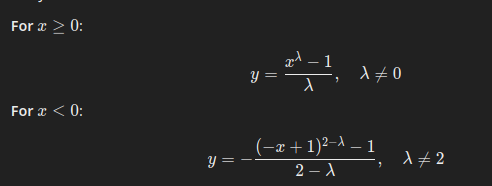

In [16]:
def yeoJohnsonTransform(data):
    data = data.copy()
    for col in ["Avg Digraph Duration", "Min Hold Time"]:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors="coerce")
            data[col].replace([np.inf, -np.inf], np.nan, inplace=True)

            if data[col].isna().sum() == len(data[col]):
                print(f"Skipping column {col}, all values are NaN after cleanup")
                continue
            data[col].fillna(data[col].median(), inplace=True)
            data[col], _ = yeojohnson(data[col])
    return data


In [17]:
data = yeoJohnsonTransform(data)

<ipython-input-16-2f14e34da9a6>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-16-2f14e34da9a6>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Typing Speed
Skew : 2.94


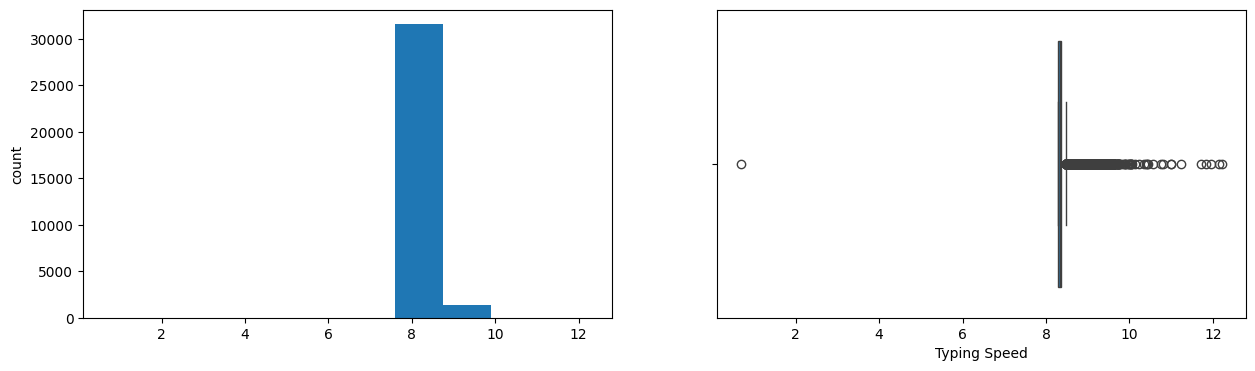

No of Backspaces
Skew : 2.06


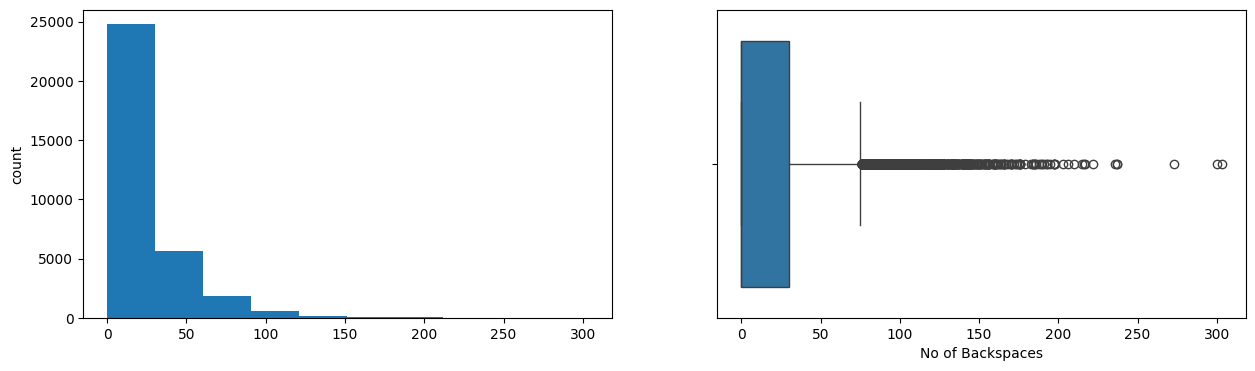

Avg Hold Time
Skew : 0.39


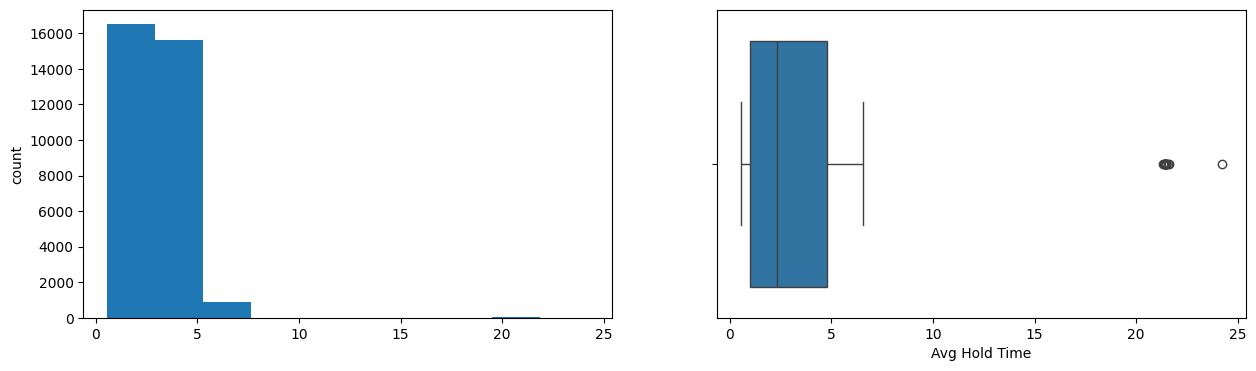

Max Hold Time
Skew : 48.52


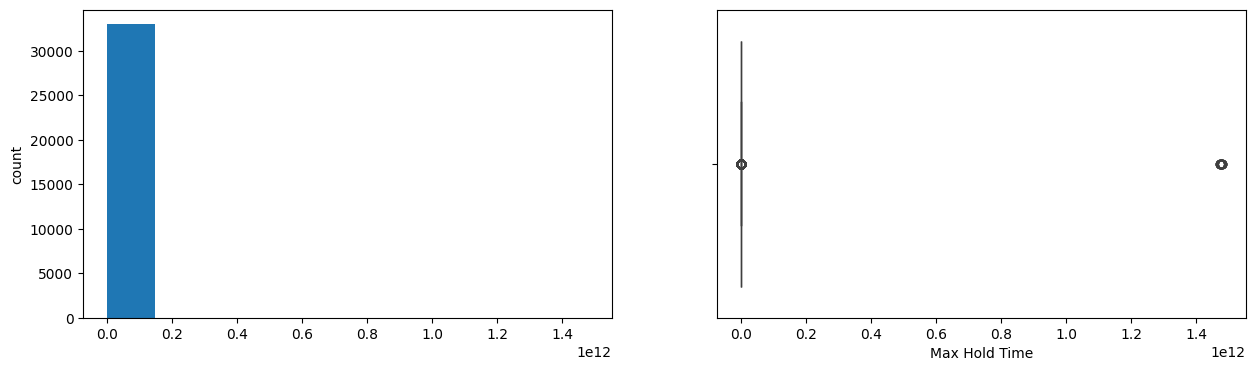

Min Hold Time
Skew : -2.35


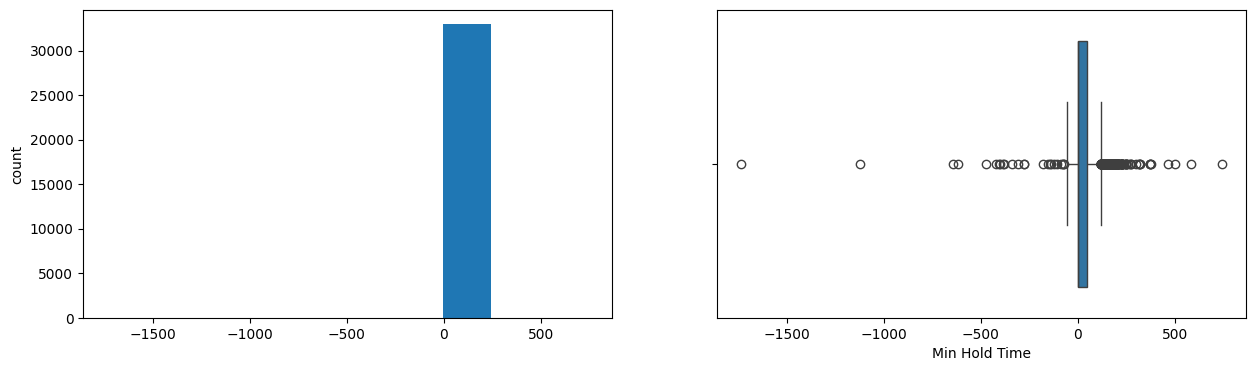

Avg Keystroke Latency
Skew : 3.0


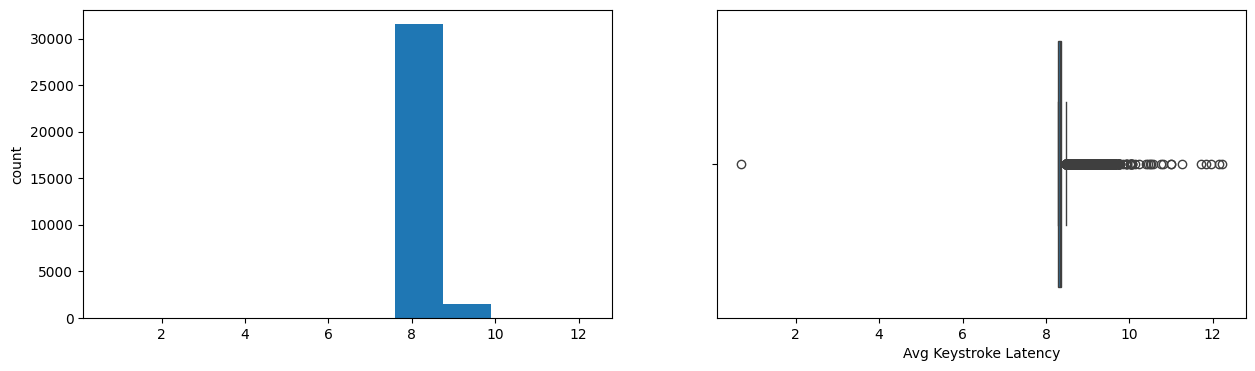

Max Keystroke Latency
Skew : 48.52


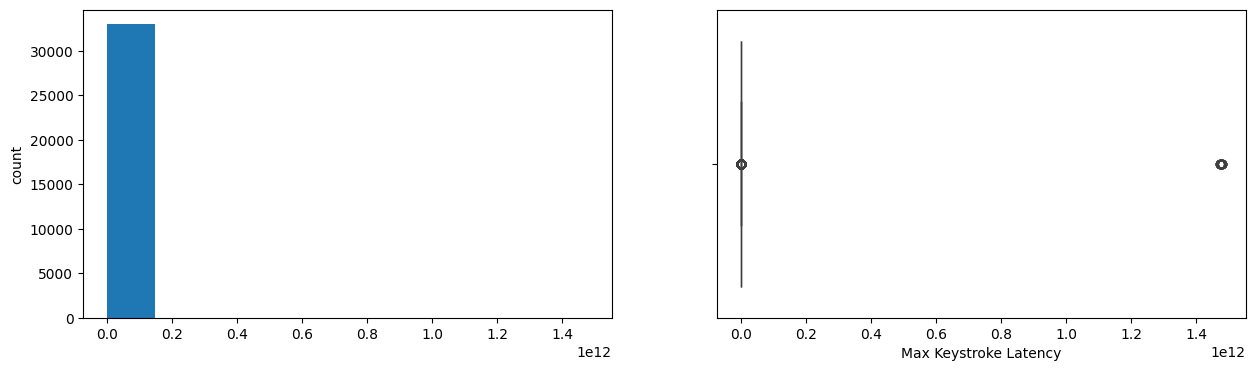

Min Keystroke Latency
Skew : -48.52


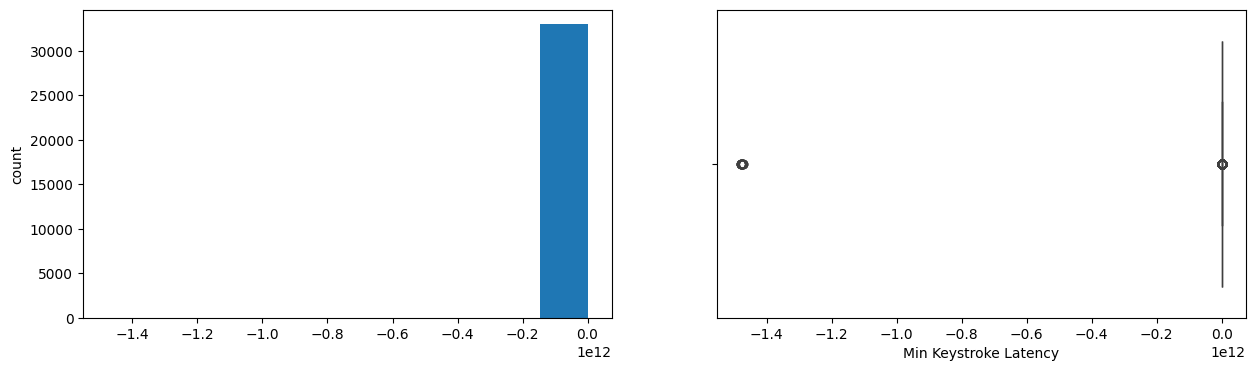

Avg Digraph Duration
Skew : 31.61


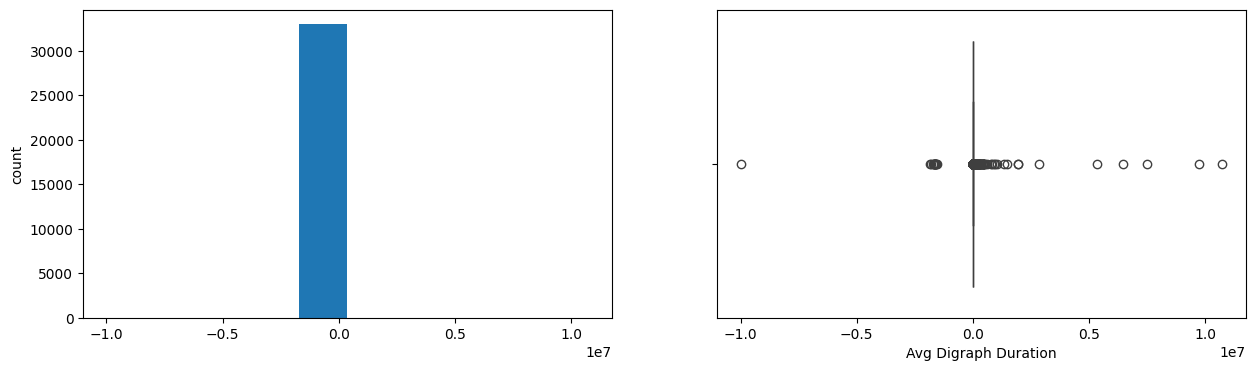

Max Digraph Duration
Skew : -0.19


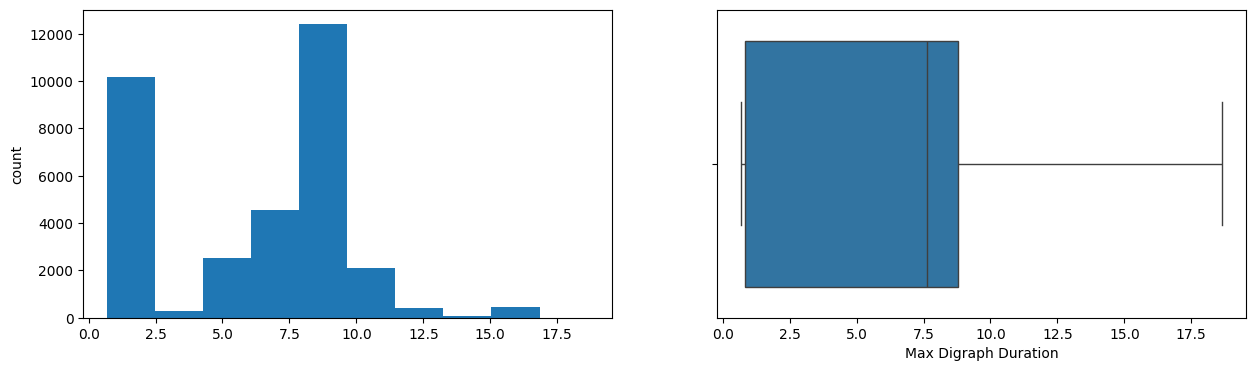

Min Digraph Duration
Skew : -48.52


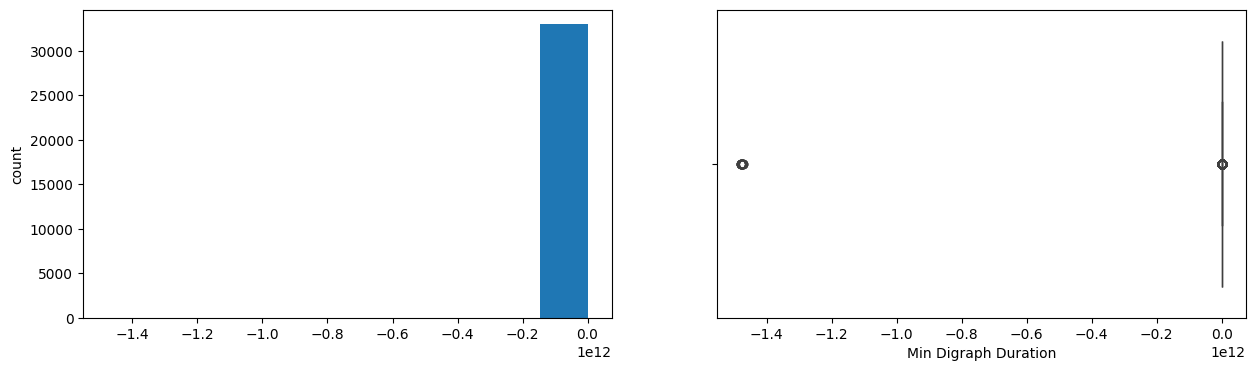

Avg Inter-Release Latency
Skew : 3.0


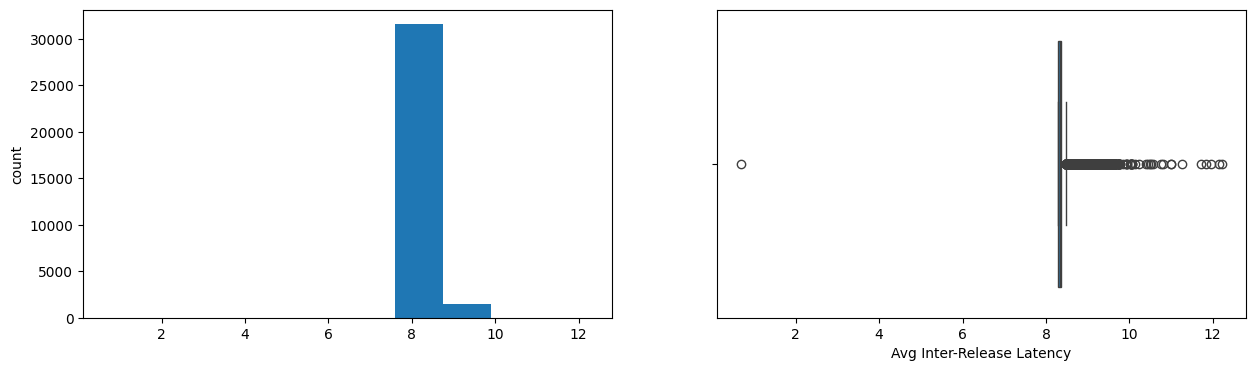

Max Inter-Release Latency
Skew : 0.07


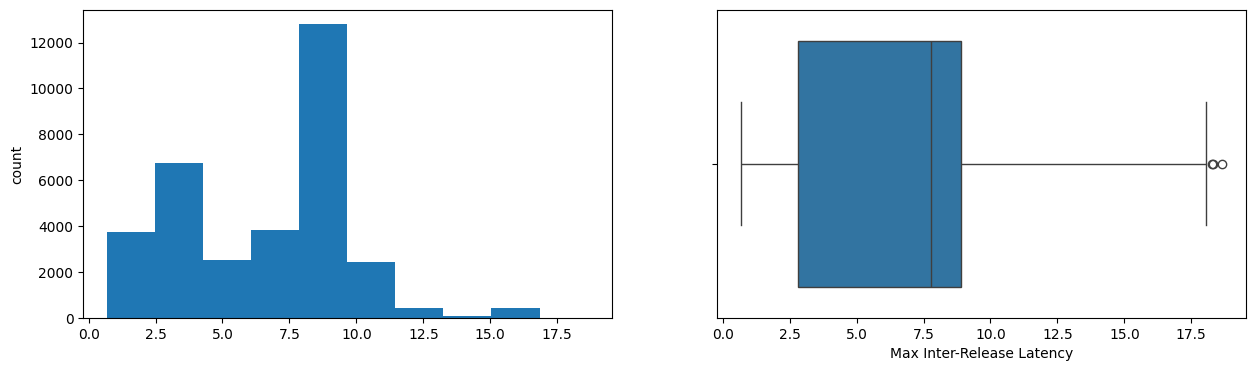

Min Inter-Release Latency
Skew : -8.71


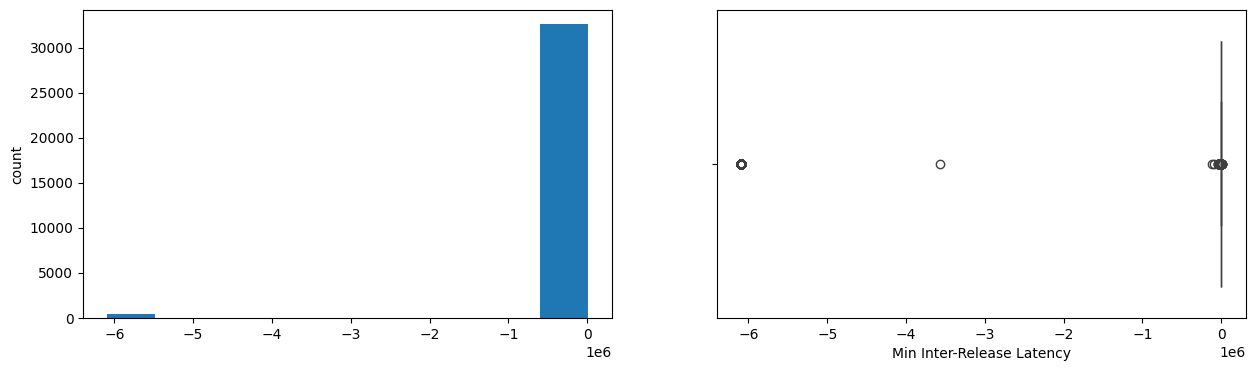

output_label
Skew : 0.0


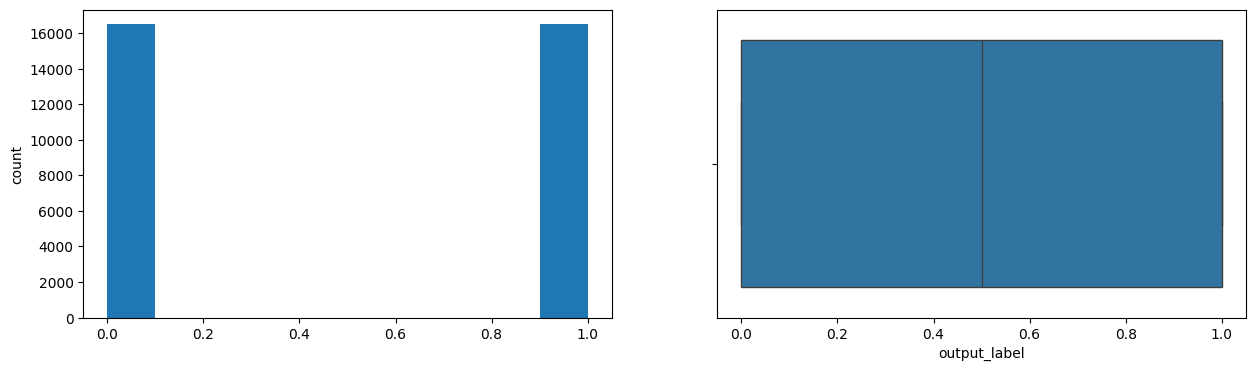

In [18]:
calculate_skewness()

In [ ]:
# min_val = data["Avg Digraph Duration"].min()
# if min_val <= 0:
#   data["Avg Digraph Duration"] = np.log1p(data["Avg Digraph Duration"] - min_val + 1)
# else:
#   data["Avg Digraph Duration"] = np.log1p(data["Avg Digraph Duration"])

In [ ]:
# calculate_skewness()

In [19]:
data = data.sample(frac=1)

In [20]:
print(data.shape)

(33000, 15)


In [21]:
def split_dataset():
  X = data.values[:,0:14]
  Y = data.values[:,14]
  print(X)
  print(Y)
  X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=100)
  return X, Y, X_train, X_test, Y_train, Y_test

In [22]:
X,Y,X_train, X_test, Y_train, Y_test = split_dataset()

[[ 8.29629689e+00  0.00000000e+00  9.73549243e-01 ...  8.29762330e+00
   2.42810922e+00 -5.81359863e+01]
 [ 8.29638377e+00  0.00000000e+00  1.01965087e+00 ...  8.29771012e+00
   6.22352542e+00 -7.74136209e+03]
 [ 8.29641895e+00  0.00000000e+00  1.00071432e+00 ...  8.29774513e+00
   5.31901202e+00 -2.89932847e+03]
 ...
 [ 8.29634843e+00  0.00000000e+00  1.00085512e+00 ...  8.29767480e+00
   5.31961319e+00 -2.99949265e+03]
 [ 8.35085157e+00  3.00000000e+01  4.49054881e+00 ...  8.35207716e+00
   8.50126704e+00 -7.90000000e+01]
 [ 9.11800959e+00  0.00000000e+00  4.89455082e+00 ...  9.12922882e+00
   1.00695103e+01  1.29000000e+02]]
[0. 0. 0. ... 0. 1. 1.]


In [23]:
def train_using_gini(X_train, X_test, Y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100)
    clf_gini.fit(X_train, Y_train)
    return clf_gini

In [24]:
def train_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [25]:
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
    print("Accuracy : ",accuracy_score(y_test, y_pred)*100)
    print("Report : ",classification_report(y_test, y_pred))

In [26]:
from sklearn import tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()


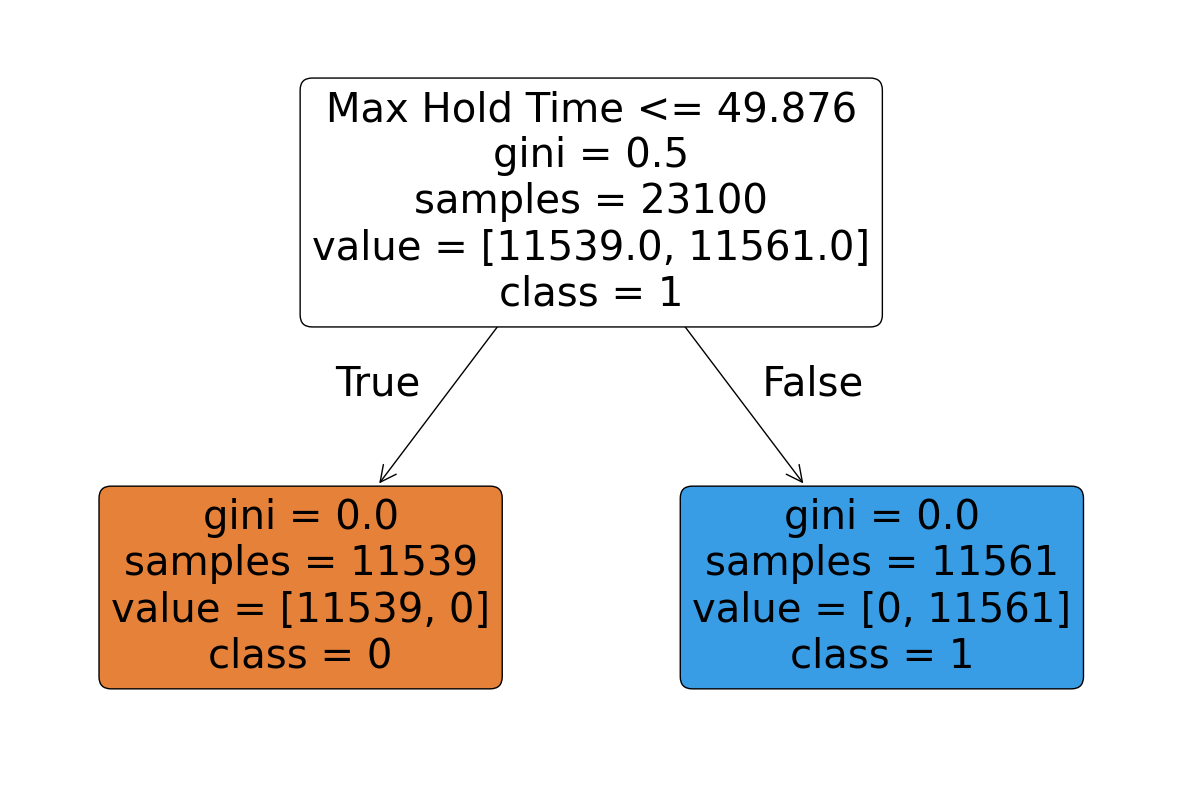

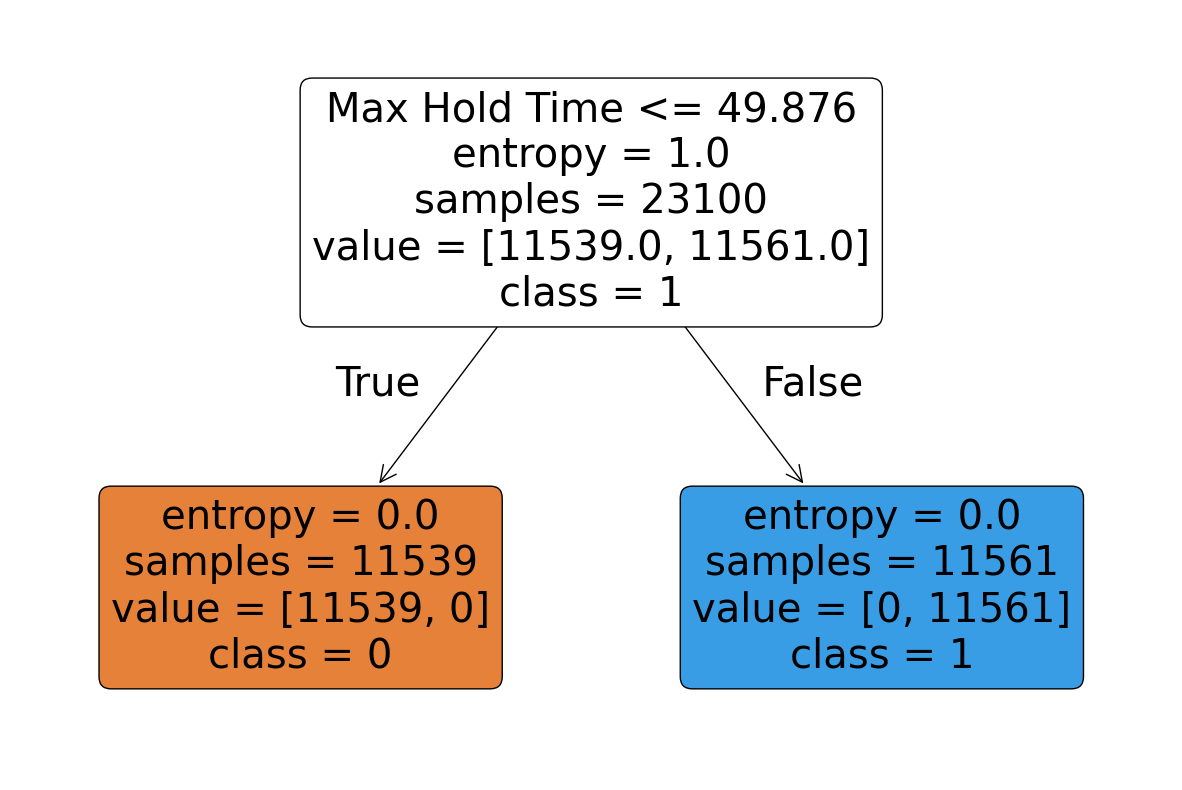

In [27]:
clf_gini = train_using_gini(X_train, X_test, Y_train)
clf_entropy = train_using_entropy(X_train, X_test, Y_train)

plot_decision_tree(clf_gini, ["Typing Speed", "Avg Hold Time", "Min Hold Time", "Max Hold Time", "Avg Keystroke Latency", "Max Keystroke Latency", "Min Keystroke Latency", "Avg Digraph Duration", "Max Digraph Duration", "Min Digraph Duration", "Avg Inter-Release Latency", "Max Inter-Release Latency", 'Min Inter-Release Latency'], ["0","1"])
plot_decision_tree(clf_entropy, ["Typing Speed", "Avg Hold Time", "Min Hold Time", "Max Hold Time", "Avg Keystroke Latency", "Max Keystroke Latency", "Min Keystroke Latency", "Avg Digraph Duration", "Max Digraph Duration", "Min Digraph Duration", "Avg Inter-Release Latency", "Max Inter-Release Latency", 'Min Inter-Release Latency'], ["0","1"])


In [28]:
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(Y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[1. 1. 1. ... 0. 1. 1.]
Confusion Matrix:  [[4960    1]
 [   1 4938]]
Accuracy :  99.97979797979798
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4961
         1.0       1.00      1.00      1.00      4939

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



In [29]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(Y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[1. 1. 1. ... 0. 1. 1.]
Confusion Matrix:  [[4960    1]
 [   1 4938]]
Accuracy :  99.97979797979798
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4961
         1.0       1.00      1.00      1.00      4939

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



In [30]:
def train_using_gini_post_pruning(X_train, X_test, Y_train):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100)
    clf_gini.fit(X_train, Y_train)

    path = clf_gini.cost_complexity_pruning_path(X_train, Y_train)
    ccp_alphas = path.ccp_alphas[:-1]  # Remove max alpha which prunes everything

    best_alpha = None
    best_score = 0

    for alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion="gini", random_state=100, ccp_alpha=alpha)
        clf.fit(X_train, Y_train)
        score = clf.score(X_test, Y_test)
        if score > best_score:
            best_score = score
            best_alpha = alpha

    clf_pruned = DecisionTreeClassifier(criterion="gini", random_state=100, ccp_alpha=best_alpha)
    clf_pruned.fit(X_train, Y_train)
    return clf_pruned

In [31]:
def train_using_gini_pre_pruning(X_train, X_test, Y_train):
    clf_pre_pruned_gini = DecisionTreeClassifier(
        criterion="gini",
        random_state=100,
        max_depth=5,  # Limit depth of tree
        min_samples_split=10,  # Minimum samples required to split a node
        min_samples_leaf=5  # Minimum samples required to be a leaf node
    )
    clf_pre_pruned_gini.fit(X_train, Y_train)
    return clf_pre_pruned_gini

In [32]:
def train_using_entropy_post_pruning(X_train, X_test, Y_train):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100)
    clf_entropy.fit(X_train, Y_train)

    path = clf_entropy.cost_complexity_pruning_path(X_train, Y_train)
    ccp_alphas = path.ccp_alphas[:-1]

    best_alpha = None
    best_score = 0

    for alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion="entropy", random_state=100, ccp_alpha=alpha)
        clf.fit(X_train, Y_train)
        score = clf.score(X_test, Y_test)
        if score > best_score:
            best_score = score
            best_alpha = alpha

    clf_pruned = DecisionTreeClassifier(criterion="entropy", random_state=100, ccp_alpha=best_alpha)
    clf_pruned.fit(X_train, Y_train)
    return clf_pruned

In [33]:
def train_using_entropy_pre_pruning(X_train, X_test, Y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy",
        random_state=100,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5
    )
    clf_entropy.fit(X_train, Y_train)
    return clf_entropy

In [34]:
def hyperparameter_tuning(X_train, Y_train):
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    print("Best Parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_

    return best_model

In [35]:
clf_gini = train_using_gini(X_train, X_test, Y_train)
clf_gini_post = train_using_gini_post_pruning(X_train, X_test, Y_train)
clf_gini_pre = train_using_gini_pre_pruning(X_train, X_test, Y_train)

clf_entropy = train_using_entropy(X_train, X_test, Y_train)
clf_entropy_post = train_using_entropy_post_pruning(X_train, X_test, Y_train)
clf_entropy_pre = train_using_entropy_pre_pruning(X_train, X_test, Y_train)

best_model = hyperparameter_tuning(X_train, Y_train)

models = {
    "Gini": clf_gini, "Gini Post": clf_gini_post, "Gini Pre": clf_gini_pre,
    "Entropy": clf_entropy, "Entropy Post": clf_entropy_post, "Entropy Pre": clf_entropy_pre,
    "Best Model": best_model
}

for name, model in models.items():
    print(f"\nResults Using {name}:")
    y_pred = prediction(X_test, model)
    cal_accuracy(Y_test, y_pred)


Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Results Using Gini:
Predicted values:
[1. 1. 1. ... 0. 1. 1.]
Confusion Matrix:  [[4960    1]
 [   1 4938]]
Accuracy :  99.97979797979798
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4961
         1.0       1.00      1.00      1.00      4939

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900


Results Using Gini Post:
Predicted values:
[1. 1. 1. ... 0. 1. 1.]
Confusion Matrix:  [[4960    1]
 [   1 4938]]
Accuracy :  99.97979797979798
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4961
         1.0       1.00      1.00      1.00      4939

    accuracy                           1.00      9900
   macro avg       1.00      1.0

In [37]:
joblib.dump(best_model, "best_keystroke_model.joblib")

['best_keystroke_model.joblib']

In [40]:
params = best_model.get_params()

In [41]:
with open('keystroke_model_params.json', 'w') as f:
    json.dump(params, f, indent=4)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

Y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.5036781609195402
Confusion Matrix:
 [[4375    0]
 [4318    7]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4375
         1.0       1.00      0.00      0.00      4325

    accuracy                           0.50      8700
   macro avg       0.75      0.50      0.34      8700
weighted avg       0.75      0.50      0.34      8700

